In [1]:
import essentia.standard
import matplotlib.pyplot as plt
import numpy as np
from dtw import *
import os
from collections import OrderedDict

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
def get_melody(hum):
    loader = essentia.standard.EqloudLoader(filename='dataset/hummings/' + hum, sampleRate=44100)
    audio = loader()
    pitch_extractor = essentia.standard.PredominantPitchMelodia(frameSize=2048, hopSize=128)
    pitch_values, pitch_confidence = pitch_extractor(audio)
    
    return pitch_values

In [3]:
def read_melody_files(filename):
    with open(filename) as f:
        _notes = f.read()

    _notes = _notes.split(',')
    return [float(i) for i in _notes]

In [4]:
def normalize(series, mmin, mmax):
    return [((i-mmin)/(mmax-mmin)) for i in series]

In [5]:
def calculate_gradient_vector(melody):
    _gradients = []

    for index, note in enumerate(melody):
        if index == 0:
            continue

        _gradients.append(note - melody[index - 1])

    return _gradients

In [6]:
def draw_plot(x1, x2):
    x1_data = x1
    y1_data = range(len(x1_data))
    x2_data = x2
    y2_data = range(len(x2_data))

    fig, ax = plt.subplots(figsize=(20,10))
    ax.plot(y1_data, x1_data, label='Song', color='blue')
    ax.plot(y2_data, x2_data, label='Humming', color = 'red')
    legend = ax.legend(loc='center right', fontsize='x-large')
    plt.xlabel('time')
    plt.ylabel('frequency')
    plt.title('Comparison of the different frequencies')
    plt.show()

In [7]:
def calculate_dtw(string1, string2):
    return dtw(string1, string2, step_pattern=rabinerJuangStepPattern(6, "c"), keep_internals=True, open_begin=True, open_end=True)

In [9]:
def process(song_file, humming_file, draw_plots=False, calc_dtw=False):
    song = read_melody_files(song_file)
    song = np.array(song)
    song = song[song != 0]

    humming = get_melody(humming_file)
    humming = humming[humming != 0]

    if draw_plots:
        print('Comparacion directa de frecuencias')
        draw_plot(song, humming)
    
    mmax = max(max(song), max(humming))
    mmin = min(min(song), min(humming))
    norm1 = normalize(song, mmin, mmax)
    norm2 = normalize(humming, min(humming), max(humming))#mmin, mmax)
    
    if draw_plots:
        print('Comparacion de frecuencias normalizadas')
        draw_plot(norm1, norm2)

    grad1 = calculate_gradient_vector(song)
    grad2 = calculate_gradient_vector(humming)

    if draw_plots:
        print('Comparacion de gradientes')
        draw_plot(grad1, grad2)

    gradnorm1 = calculate_gradient_vector(norm1)
    gradnorm2 = calculate_gradient_vector(norm2)

    if draw_plots:
        print('Comparacion de gradientes de frecuencias normalizadas')
        draw_plot(gradnorm1, gradnorm2)
    
    if calc_dtw:
        #print('dtw frecuencias directas:')
        #print(calculate_dtw(humming, song).distance)
        #print('dtw frecuencias normalizadas:')
        #print(calculate_dtw(norm2, norm1).distance)
        #print('dtw gradientes:')
        #print(calculate_dtw(grad2, grad1).distance)
        print(song_file)
        dtw_result = calculate_dtw(gradnorm2, gradnorm1)
        distance = dtw_result.distance
        print(distance)

        dtw_result.plot(type="twoway", offset=-2)
        
        return distance

    return -1

In [ ]:
#song = 'dataset/melodies/strings/vocals/Adele - Rolling in the Deep.txt'
#humming = 'Adele - Rolling In The Deep.wav'

#process(song, humming, draw_plots=False, calc_dtw=True)

In [ ]:
song = 'dataset/melodies/strings/vocals/Smash Mouth - All Star.txt'
humming = 'Smash Mouth - All Star.mp3'

process(song, humming, draw_plots=True, calc_dtw=True)

In [ ]:
song = 'dataset/melodies/strings/vocals/Enrique Iglesias - Bailando.txt'
humming = 'Smash Mouth - All Star.mp3'

process(song, humming, draw_plots=True, calc_dtw=True)

dataset/melodies/strings/concatenations/Vanessa Carlton - A Thousand Miles.txt
22.592240762366703


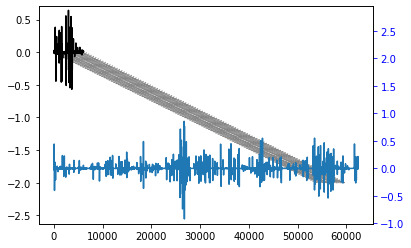

22.592240762366703

In [10]:
song = 'dataset/melodies/strings/concatenations/Vanessa Carlton - A Thousand Miles.txt'
humming = 'Vanessa Carlton - A Thousand Miles.mp3'

process(song, humming, draw_plots=False, calc_dtw=True)

In [ ]:
hummings_path = os.listdir('dataset/hummings/')
hummings = os.listdir('dataset/hummings/')
#humming = 'Adele - Rolling In The Deep.wav'

vocals_path = 'dataset/melodies/strings/vocals/'
vocals = os.listdir(vocals_path)

accompaniments_path = 'dataset/melodies/strings/accompaniments/'
accompaniments = os.listdir(accompaniments_path)

concatenations_path = 'dataset/melodies/strings/concatenations/'
concatenations = os.listdir(concatenations_path)

for humming in hummings:
    if humming != 'Vanessa Carlton - A Thousand Miles.mp3':
        continue

    print(humming)
    results = {}

    #for vocal in vocals:
        #results['Vocal: ' + vocal] = process(vocals_path + vocal, humming, calc_dtw=True)

    #for accompaniment in accompaniments:
        #results['Accompaniment: ' + accompaniment] = process(accompaniments_path + accompaniment, humming, calc_dtw=True)
        
    for concatenation in concatenations:
        results['Concatenation: ' + concatenation] = process(concatenations_path + concatenation, humming, calc_dtw=True)

    ordered_results = OrderedDict({k: v for k, v in sorted(results.items(), key=lambda item: item[1])})

    for key, value in ordered_results.items():
        print(value, key)
        print("----------")
    
    print('====================')